# ROC-AUC

## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('processed_train.csv')

In [3]:
data.head() 

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


In [4]:
data.shape

(119952, 79)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119952 entries, 0 to 119951
Data columns (total 79 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      119952 non-null  float64
 1   AppVersion                                         119952 non-null  float64
 2   AvSigVersion                                       119952 non-null  float64
 3   RtpStateBitfield                                   119952 non-null  float64
 4   IsSxsPassiveMode                                   119952 non-null  int64  
 5   AVProductStatesIdentifier                          119952 non-null  float64
 6   AVProductsInstalled                                119952 non-null  float64
 7   AVProductsEnabled                                  119952 non-null  float64
 8   HasTpm                                             119952 non-null  int64 

### Task 2

Check target class balance.

In [6]:
print(sum(data['HasDetections'] == 1), '- positive class,')
print(sum(data['HasDetections'] == 0), '- negative class')

20012 - positive class,
99940 - negative class


### Task 3

Split data on train and test samples.

In [7]:
y = data['HasDetections']
X = data.drop('HasDetections', axis=1)

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     shuffle=True, 
                                                     random_state=1)

### Task 4

Fit a logistic regression using cross_validation and check `accuracy` metric on both train and test samples.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', C=0.01))
])

cv = [(X_train.index.to_list(), X_test.index.to_list())]

result = cross_validate(pipe, X, y, scoring='accuracy', cv=cv, return_train_score=True)

In [10]:
print(f'Train Accuracy: {result["train_score"][0]:.7f}')

Train Accuracy: 0.8411920


In [11]:
print(f'Test Accuracy: {result["test_score"][0]:.7f}')

Test Accuracy: 0.8421035


### Task 5

Build a ROC-AUC curve on train data.

AUC=0.699


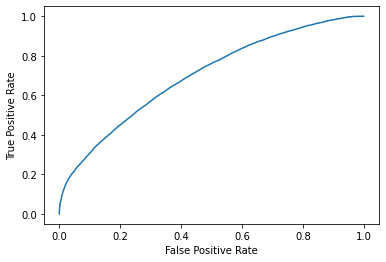

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 


fpr, tpr, thresholds = roc_curve(y_train, pipe.fit(X_train, y_train).predict_proba(X_train)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(f'AUC={auc(fpr, tpr):.3f}')

### Task 6

Build a ROC-AUC curve on test data.

AUC=0.697


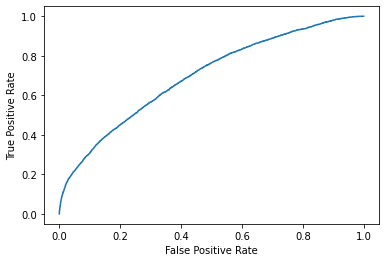

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.fit(X_train, y_train).predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(f'AUC={auc(fpr, tpr):.3f}')

### Task 7

Build PR-curve on train data. 

AUC=0.366


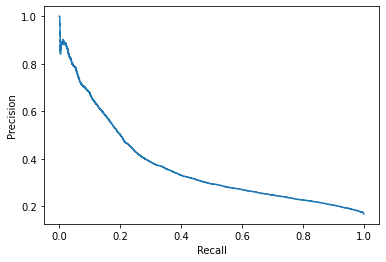

In [14]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, pipe.fit(X_train, y_train).predict_proba(X_train)[:, 1])
PrecisionRecallDisplay(precision, recall).plot()
print(f'AUC={auc(recall, precision):.3f}')

### Task 8. 

Build PR-curve on test data.

AUC=0.359


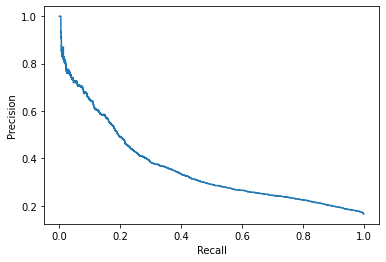

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe.fit(X_train, y_train).predict_proba(X_test)[:, 1])
PrecisionRecallDisplay(precision, recall).plot()
print(f'AUC={auc(recall, precision):.3f}')

### Task 9. 

Build a calibration curve and compare our model results with random model and an ideal model.

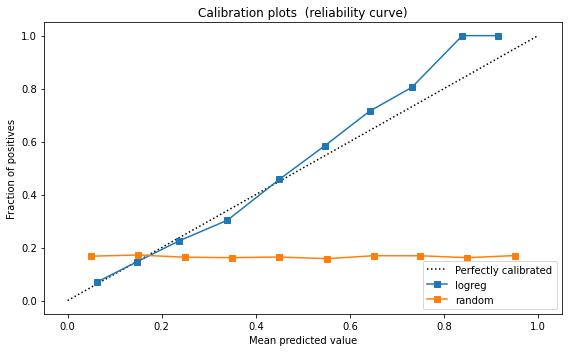

In [16]:
from sklearn.calibration import calibration_curve


# perfectly calibrated line
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')

# model predictions on test data
prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='logreg')

# random model prediction results
prob_pos = np.random.uniform(size=(X_test.shape[0],))
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='random')

plt.ylabel('Fraction of positives')
plt.xlabel('Mean predicted value')
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')
plt.title('Calibration plots  (reliability curve)')
plt.tight_layout()

As we can see from the graphs, our model is well calibrated. 